<a href="https://colab.research.google.com/github/JoaoSiqueiraDS/Joao_Siqueira_Portifolio/blob/master/Credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

from imblearn.under_sampling import RandomUnderSampler

# configure Seaborn

sns.set_style('dark')

!pip install -q scikit-plot

import scikitplot as skplt


[notice] A new release of pip available: 22.2.2 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Then the data set is related to a variable *df* . Yet in this part a test data frame is created using the .sample() method. This data frame is going to be used as an ultimate validation of the trained model.


In [99]:
file_path = "creditcard.csv"

# Importing the data set to dataframe (df)

df = pd.read_csv(file_path)

# Creating a test dataset

test = df.sample(frac=0.15, random_state=0)

Nice … Now with our data frame df defined it is possible to analyze the data. Through the method df.head()   it was possible to take very first look at the data and the method df.describe() could give us some statistical information. For example, through this last analysis it was possible to detect outliers in the "Amount" variable. Another important analysis done was counting the number of null values on each column. That was possible through a simple command df.isnull().sum(). There are no missing values. 
Checking how balanced is the data set is the next step. Seaborn is a good option for this kind of analysis.



In [100]:
# First lines of the data set

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [101]:
# Stats summary

df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [102]:
# Is there null values?

df.isnull().sum().max()

0

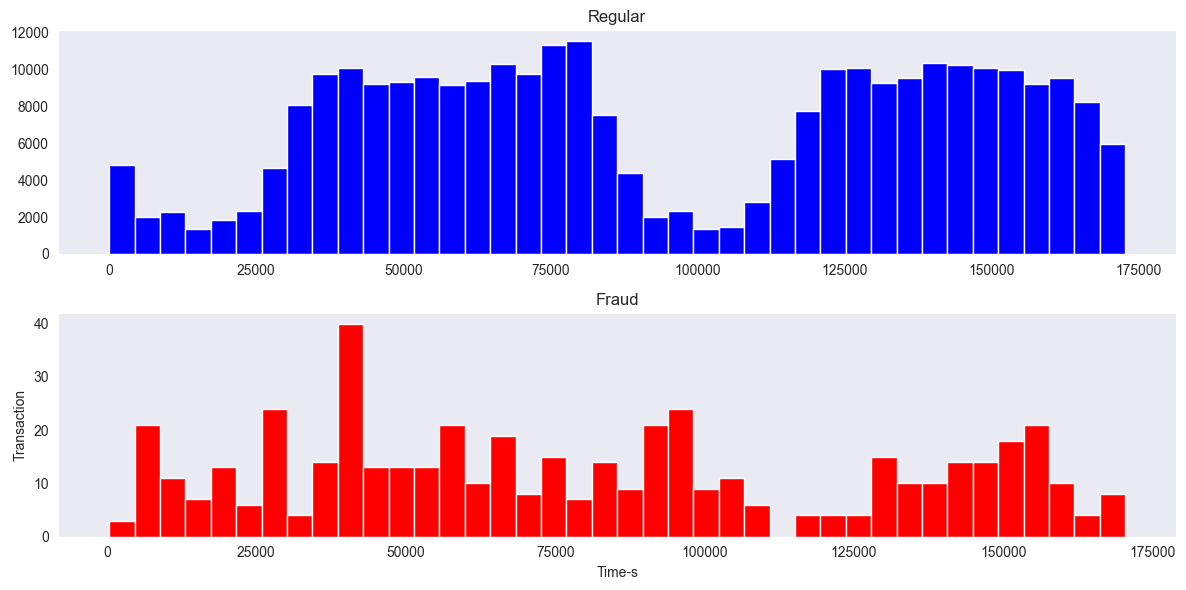

In [103]:
from IPython.core.pylabtools import figsize
# Plotting Class according to Time

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,6))

num_bins=40

ax[0].hist(df['Time'][df['Class']==0], bins=num_bins, color='b')
ax[1].hist(df['Time'][df["Class"]==1], bins=num_bins, color='r')

ax[0].set_title('Regular')
ax[1].set_title('Fraud')

plt.xlabel('Time-s')
plt.ylabel('Transaction')
plt.tight_layout()

In [104]:
# Fraud stats

df.loc[(df['Class']==1) & (df["Amount"]<2000), ["Amount"]].describe()

,Amount
count,491.000000
mean,118.130550
std,240.439028
min,0.000000
25%,1.000000
50%,9.210000
75%,105.350000
max,1809.680000


In [105]:
# Density Plots

# density_df = df.drop(["Class", 'Amount', 'Time'], axis=1)
# num_plots = len(density_df)

# df_class_0 = df[df['Class']==0]
# df_class_1 = df[df['Class']==1]

# fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(18,18))
# fig.subplots_adjust(hspace=1, wspace=1)
# idx = 0

# for col in density_df:
#   idx += 1
#   plt.subplot(7, 4, idx, facecolor='#8b9d87')
#   sns.kdeplot(df_class_0[col], label="Class 0", shade=True, color="r")
#   sns.kdeplot(df_class_1[col], label="Class 1", shade=True, color='k')
#   plt.title(col, fontsize=10)
# plt.tight_layout()

## Data Preparation

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance). In this dataset the variables "Time" and "Amount" were standardized, as seen below. For this step it was used the library Scikit-Learn.

In [106]:
# Having Time and Amount in the same scale

df_clean = df.copy()

std_scaler = StandardScaler()
df_clean["std_amount"]=std_scaler.fit_transform(df_clean['Amount'].values.reshape(-1,1))
df_clean['std_time']=std_scaler.fit_transform(df_clean['Time'].values.reshape(-1,1))
df_clean.drop(['Time','Amount'], axis=1, inplace=True)

The next step is to separate the data set in train and validation. Again Scikit-Learn was used.

In [107]:
# Separate the data set in train and validation

X = df_clean.drop("Class", axis=1)
y = df['Class']

X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, shuffle=True)


Previously it was seen that this data set is absolutely unbalanced. To solve this problem a method of under-sampling, which randomly extracts a sub class from the main class, was applied to the data set.

In [108]:
# Balancing the data. In this project it will be done by suing the library IMBLearn and UnderSampling

rus = RandomUnderSampler()

X_rus, y_rus = rus.fit_resample(X_train, y_train)

In [109]:
# Checking how balanced the data is

print(pd.Series(y_rus).value_counts())

0    369
1    369
Name: Class, dtype: int64


<AxesSubplot: ylabel='count'>

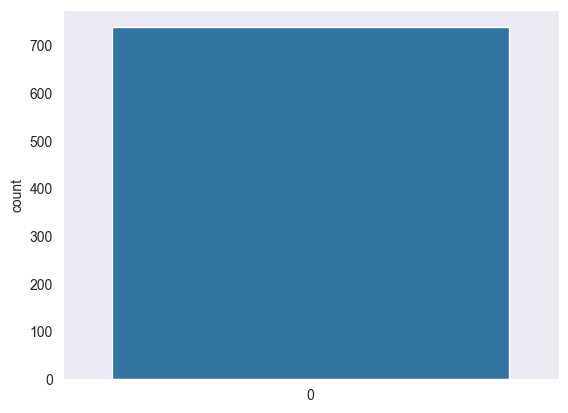

In [110]:
# Plotting the new distribution

sns.countplot(y_rus)

Correlation Matrix can show unexpected relations in our data set. There is a huge difference between a correlation matrix of a balanced and unbalanced data set. That reinforces the necessity of balancing the data set.

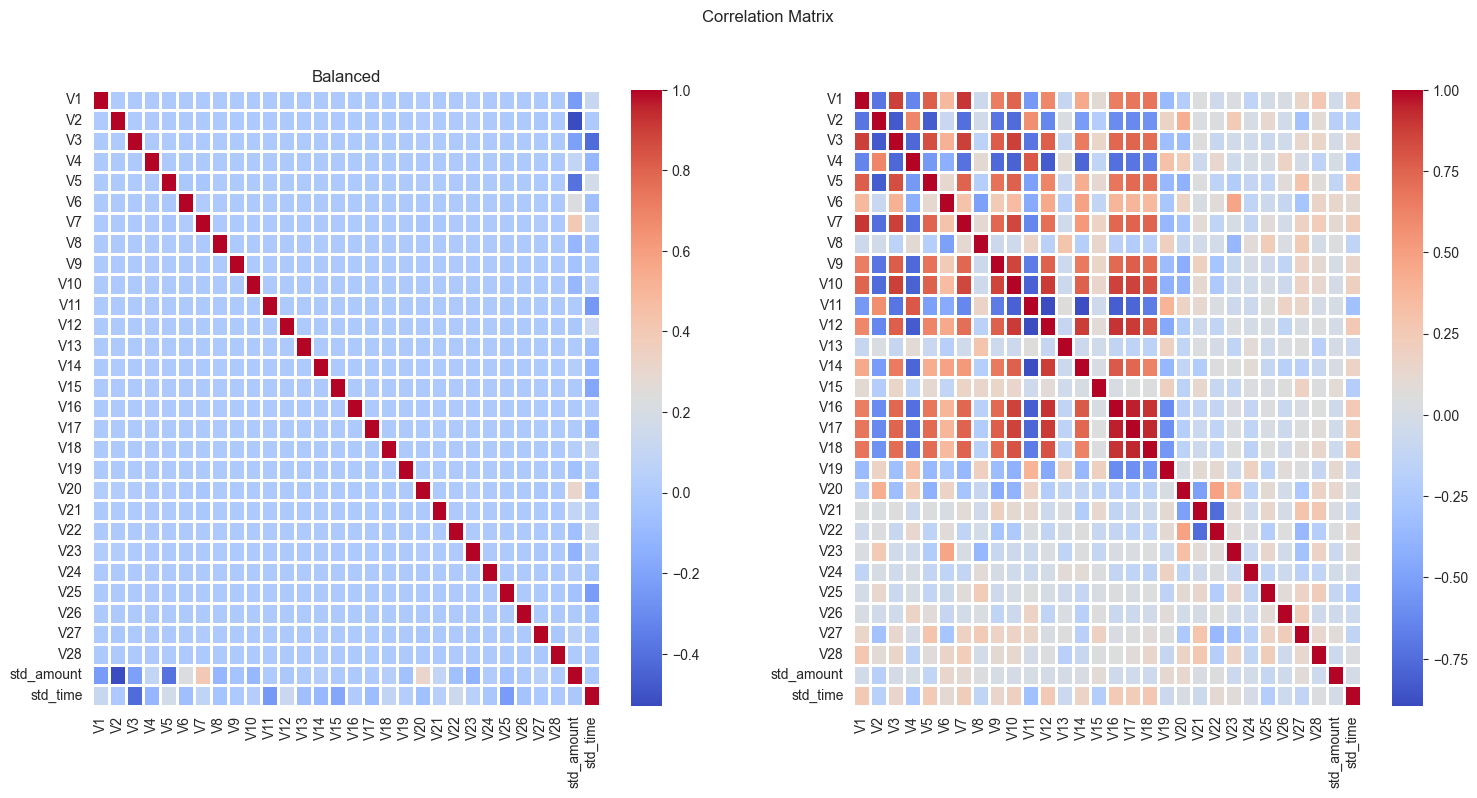

In [111]:
# Plotting a correlation matrix

corr = X_train.corr()

corr_rus = pd.DataFrame(X_rus).corr()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
fig.suptitle('Correlation Matrix')

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=1, cmap='coolwarm', ax=ax[0])
ax[0].set_title('Unbalanced')

sns.heatmap(corr_rus, xticklabels=corr_rus.columns, yticklabels=corr_rus.columns, linewidths=1, cmap='coolwarm', ax=ax[1])
ax[0].set_title('Balanced')

plt.show()

## Learning Model

Now the data is prepared to train a model. The objective of this project is to train a model to forecast credit card frauds. This way, for this the model chosen was Logistic Regression, which is applied to predict categorical variables (yes or no, tru or false, malign or benign, cat or dog, etc).

The steps for training a model and predict, after choosing it, are:
1. Instantiating the model
2. Train the model
3. Predict using the model

In [112]:
# Instantiating the model 

np.random.seed(2)

model=LogisticRegression()
model.fit(X_rus, y_rus)

# Predicting using Model 

y_pred = model.predict(X_val)
y_proba = model.predict_proba(X_val)

In [113]:
# Predicting using Model 

y_pred = model.predict(X_val)
y_proba = model.predict_proba(X_val)

## Assessing the machine model performance.

Great! We have now a machine learning model that can tell us, based on some bank information, whether a transaction is more likely or not to be a fraud. But, is the model predicting well? Let's answer it through a confusion matrix, classification report, accuracy and area-under-curve score.

classification report: 
               precision    recall  f1-score   support

           0     0.9999    0.9684    0.9839     71079
           1     0.0486    0.9350    0.0925       123

    accuracy                         0.9683     71202
   macro avg     0.5243    0.9517    0.5382     71202
weighted avg     0.9982    0.9683    0.9823     71202

Accuracy: 0.9683014522063987
AUC:0.9516592496360112


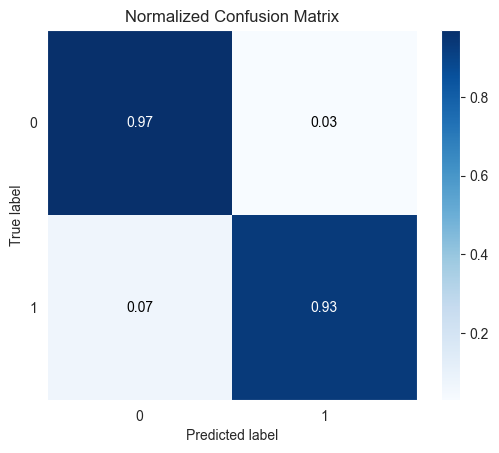

In [114]:
# Plotting Logistic Regression model

# Plotting the confusion matrix

skplt.metrics.plot_confusion_matrix(y_val, y_pred, normalize=True)

# Print classification report

print("classification report: \n", classification_report(y_val, y_pred, digits=4))

# Print model accuracy

print("Accuracy: {}".format(accuracy_score(y_val, y_pred)))

# Print area under curve

print('AUC:{}'.format(roc_auc_score(y_val, y_pred)))

Results show that trained model performs well. The model presented high accuracy and area-under-curve numbers. The next step is to use this model in a test data set. In the very beginning of this article it was shown that we created this data set (called test). The same trained model was used to predict the 'test' data set.

# Predicting with test data

In [115]:
# Standardize the columns Amount and Time in the test dataset

test_clean = test.copy()

test_clean['std_amount'] = std_scaler.fit_transform(test_clean['Amount'].values.reshape(-1,1))
test_clean['std_time'] = std_scaler.fit_transform(test_clean['Time'].values.reshape(-1,1))

test_clean.drop(['Time','Amount'], axis=1, inplace=True)

test_clean

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
183484,-0.323334,1.057455,-0.048341,-0.607204,1.259821,-0.091761,1.159101,-0.124335,-0.174640,-1.644401,...,-0.433890,-0.261613,-0.046651,0.211512,0.008297,0.108494,0.161139,0,-0.177738,0.658372
255448,-0.349718,0.932619,0.142992,-0.657071,1.169784,-0.733369,1.009985,-0.071069,-0.302083,-1.192404,...,-0.833209,-0.030360,0.490035,-0.404816,0.134350,0.076830,0.175562,0,-0.321945,1.320094
244749,-1.614711,-2.406570,0.326194,0.665520,2.369268,-1.775367,-1.139049,0.329904,0.903813,-0.219013,...,1.134489,0.965054,0.640981,-1.801998,-1.041114,0.286285,0.437322,0,0.034666,1.219742
63919,-2.477184,0.860613,1.441850,1.051019,-1.856621,2.078384,0.510828,-0.243399,-0.260691,0.133040,...,0.692245,0.150121,-0.260777,0.005183,-0.177847,-0.510060,-0.660533,0,0.838765,-0.919236
11475,1.338831,-0.547264,0.737389,-0.212383,-1.110039,-0.525744,-0.801403,-0.063672,0.997276,0.113386,...,-0.074719,0.067055,0.333122,0.379087,-0.268706,-0.002769,0.003272,0,-0.310490,-1.572827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229333,-0.330429,0.587057,0.635175,-0.619929,0.690199,-1.146289,0.914373,-0.158436,-0.160107,-0.681300,...,-0.540837,0.047329,-0.037745,-0.671478,0.119750,0.094611,0.173363,0,-0.324562,1.081011
189242,-17.015895,-18.501723,-2.965763,5.989228,7.811563,-4.440128,-1.905238,-1.938201,3.276087,3.752052,...,3.688960,11.360879,0.771200,2.274458,1.954516,6.507171,-4.075417,0,-0.305294,0.710949
232656,0.044490,0.898231,0.306854,-0.587229,0.441139,-1.121860,1.039291,-0.231897,-0.108498,-0.422824,...,-0.535225,0.064659,0.050984,-0.476387,0.136342,0.250095,0.098383,0,-0.319252,1.109828
174418,1.945191,-0.273317,-0.126410,0.436141,-0.841361,-1.026928,-0.323962,-0.216008,0.809408,-0.043048,...,-0.481833,0.466048,0.482353,-0.668233,0.198535,-0.033724,-0.033819,0,-0.238462,0.575883


In [116]:
# Separar variáveis entre X e y

X_test = test_clean.drop('Class', axis=1)
y_test = test['Class']

In [117]:
# Prediction using both models

# Logistic Regression

y_pred_t1 = model.predict(X_test)
y_proba_t1 = model.predict_proba(X_test)

classification report: 
               precision    recall  f1-score   support

           0     0.9999    0.9691    0.9843     42647
           1     0.0505    0.9459    0.0958        74

    accuracy                         0.9691     42721
   macro avg     0.5252    0.9575    0.5400     42721
weighted avg     0.9983    0.9691    0.9827     42721

Accuracy: 0.9690784391751129
AUC:0.9575322620202682


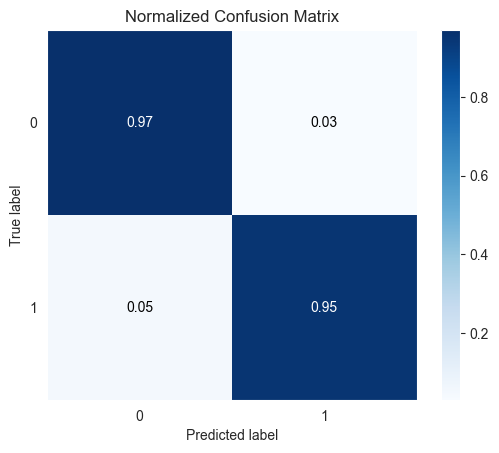

In [118]:
# Plotting Logistic Regression model - Test dataset

# Plotting the confusion matrix

skplt.metrics.plot_confusion_matrix(y_test, y_pred_t1, normalize=True)

# Print classification report

print("classification report: \n", classification_report(y_test, y_pred_t1, digits=4))

# Print model accuracy

print("Accuracy: {}".format(accuracy_score(y_test, y_pred_t1)))

# Print area under curve

print('AUC:{}'.format(roc_auc_score(y_test, y_pred_t1)))

In [120]:
import pickle
pickle.dump(model, open('credittransfraud.sav','wb'))

In [121]:
def prediction_fun(v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,std_amount,std_time):
    import pickle
    x = [[v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,std_amount,std_time]]
    obj = pickle.load(open('credittransfraud.sav','rb'))
    prediction = obj.predict(x).item()
    print(prediction)
    if prediction == 0:
        prediction = "Not Fraud"
    else:
        prediction = "Fraud"
    return prediction

In [122]:
prediction_fun(-1.359807134,-0.072781173,2.536346738,0.378155224,-0.33832077,1.462387778,0.239598554,0.098697901,0.36378697,
               0.090794172,-0.551599533,-0.617800856,-0.991389847,-0.311169354,1.468176972,-0.470400525,0.207971242,0.02579058,
               0.40399296,0.251412098,-0.018306778,0.277837576,-0.11047391,0.066928075,0.128539358,-0.189114844,0.133558377,
               -0.021053053,149.62,147852)

0


C:\Users\Ajay\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


'Not Fraud'

In [123]:
# X_rus.iloc[733:734].values.tolist()

In [124]:
prediction_fun(-24.5902447690465,14.0445667815106,-26.2787005866145,6.32008926518927,-18.2245126736673,-4.60996782569686,
               -17.6810033715155,16.2136267471409,-3.79409346877414,-8.37275316035861,4.90168265513877,-6.87283866404082,
               0.769776762734501,-6.82658448658054,-0.0544341798176028,-6.08495266503583,-12.375270529796,-4.81034474126699,
               0.936742237936608,1.64920202229571,1.77706277243531,-1.80487368611576,-1.14060456917063,0.152234466415679,
               1.71599702403257,-0.22047119903665,1.43495058143483,0.422491857762666,0.046539245565032604,-1.42408125101593)

1


C:\Users\Ajay\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


'Fraud'

In [125]:
prediction_fun(-24.5902447690465,14.0445667815106,-26.2787005866145,6.32008926518927,-18.2245126736673,-4.60996782569686,
               -17.6810033715155,16.2136267471409,-3.79409346877414,-8.37275316035861,4.90168265513877,-6.87283866404082,
               0.769776762734501,-6.82658448658054,-0.0544341798176028,-6.08495266503583,-12.375270529796,-4.81034474126699,
               0.936742237936608,1.64920202229571,1.77706277243531,-1.80487368611576,-1.14060456917063,0.152234466415679,
               1.71599702403257,-0.22047119903665,1.43495058143483,0.422491857762666,147852,147.36)

1


C:\Users\Ajay\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


'Fraud'

In [153]:
def prediction_funtion():
    import pickle
    x = []
    df_test = pd.read_csv('test.csv')
    rowlist = df_test.values.tolist()[0][:-2]
    x.extend(rowlist)
    time = int(input("Enter time:"))
    x.append(time)
    Amnt = round(float(input("Enter Amount:")))
    x.append(Amnt)
    v = []
    v.append(x)
    obj = pickle.load(open('credittransfraud.sav','rb'))
    
    prediction = obj.predict(v).item()
    if prediction == 0:
        prediction = "Not Fraud"
    else:
        prediction = "Fraud"
    return prediction

In [154]:
prediction_funtion()

Enter time:147852
Enter Amount:123.36


C:\Users\Ajay\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


'Fraud'

## Conclusion

That could be considered a easy data science project however, as could be seen, it was not trivial to obtain the results. The trained model worked quite well on the test data set but there is certainly room for improvement. Testing other models or tuning the parameters are some things that could result in better predictions.